In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
from datetime import datetime
%matplotlib inline



In [2]:
df = pd.read_csv('HIV.csv')
df.head()

,Date,Title,article
0,"May 22, 2001, 12:40 IST",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"May 28, 2001, 15:19 IST","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"Aug 13, 2001, 23:36 IST",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"Aug 7, 2001, 23:19 IST",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"Seema Kamdar,Aug 15, 2001, 01:23 IST",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [3]:
df.dropna(how='any', axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:


df['Date'] = df['Date'].apply(lambda x: re.findall(r'[a-zA-Z]{3}\s[0-9]{1,2}(?:,)*(?:\s)*[0-9]{4}', x))



In [5]:
df.head()

,Date,Title,article
0,"[May 22, 2001]",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"[May 28, 2001]","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"[Aug 13, 2001]",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"[Aug 7, 2001]",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"[Aug 15, 2001]",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [6]:
df['Date'] = df.Date.apply(', '.join)
df.head()

,Date,Title,article
0,"May 22, 2001",Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,"May 28, 2001","NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,"Aug 13, 2001",Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,"Aug 7, 2001",Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,"Aug 15, 2001",Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [7]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
df.head()

,Date,Title,article
0,2001-05-22,Chinese HIV+ family seek compensation,shanghai: a father and daughter infected with ...
1,2001-05-28,"NACO declares HIV, AIDS epidemics",patna: with the hiv infection affecting about ...
2,2001-08-13,Levi's contributes to HIV/AIDS awareness,bangalore: the levi strauss foundation on mond...
3,2001-08-07,Mehta denies HIV blood given to Jamnagar boy,gandhinagar: state health minister suresh meht...
4,2001-08-15,Three-in-one drug for HIV receives mixed reaction,"mumbai: the launch of a capsule, a combination..."


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:


df = df.reset_index(drop=True).set_index('Date')



In [52]:
list(df)

['label', 'df', 'x', 'y']

In [10]:
df.index = pd.to_datetime(df.index)

In [11]:
df1 = df.resample('AS').count()
df1.head()

,Title,article
Date,,
2001-01-01,27,27
2002-01-01,82,82
2003-01-01,95,95
2004-01-01,59,59
2005-01-01,58,58


In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import ward, dendrogram
import os

In [13]:
def tokenize_and_stem(text_file):
    # declaring stemmer and stopwords language
    stemmer = SnowballStemmer("english")
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text_file)
    filtered = [w for w in words if w not in stop_words]
    stems = [stemmer.stem(t) for t in filtered]
    return stems

In [14]:
def tokenize_and_stem(text_file):
    # declaring stemmer and stopwords language
    stemmer = SnowballStemmer("english")
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text_file)
    filtered = [w for w in words if w not in stop_words]
    stems = [stemmer.stem(t) for t in filtered]
    return stems


In [15]:
import nltk

In [16]:
nltk.download('stopwords')`

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chinmay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
list(df)

['Title', 'article']

In [20]:
# text data in dataframe and removing stops words
stop_words = set(stopwords.words('english'))
df['Title'] = df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [21]:
    # Using TFIDF vectorizer to convert convert words to Vector Space
    tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=tokenize_and_stem)

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chinmay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
    # Fit the vectorizer to text data
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Title'])
    terms = tfidf_vectorizer.get_feature_names()
    print(terms)

['!', '#', '$', '%', '&', "'", "''", "'2", "'s", '+', '+ve', ',', '-', '-ve', '.', '...', '.59', '/font', '0.31', '1', '1,000', '1,004th', '1,207', '1,400', '1,526', '1,717', '1.7', '10', '10,000', '10-year-old', '100', '100,000', '107', '10l', '11', '11,846', '11l', '12', '12,000', '120', '127', '132', '135,630', '13th', '142', '15', '15-19', '15-24', '15-29', '156', '157', '15k', '16', '16,000', '16l', '17', '18', '18-month', '180', '19', '2', '2,001', '2,500-mark', '2-day', '2.5m', '2.6', '2.6l', '20', '20,500', '200', '2002', '2004', '2004-06', '2007', '2008', '2009', '2011-12', '2013', '2014-15', '2016', '2016-17', '2018', '2020', '21', '211', '21l', '22', '22,000', '23', '24', '24,000', '25', '26', '27', '280', '29', '29,221', '29,444', '297', '2k', '2l', '2nd', '3', '3.5', '3.9', '30', '30-year-old', '300', '300cr', '33', '34', '340', '35', '36', '377', '38', '38-day-old', '39', '3l', '3rd', '3rd-line', '4', '4-yr-old', '4.23', '40', '40-yr-old', '400', '42', '43,000', '44', '45

In [27]:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=1, verbose=0, random_state=3425)
    km.fit(tfidf_matrix)
    labels = km.labels_
    clusters = labels.tolist()

In [28]:
clusters

[6,
 5,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 0,
 0,
 2,
 4,
 0,
 5,
 2,
 2,
 0,
 2,
 2,
 0,
 4,
 2,
 5,
 4,
 4,
 4,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 4,
 5,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 5,
 2,
 4,
 0,
 4,
 2,
 0,
 4,
 0,
 0,
 4,
 4,
 2,
 4,
 2,
 4,
 5,
 4,
 4,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 4,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 3,
 2,
 0,
 2,
 0,
 6,
 2,
 0,
 4,
 2,
 5,
 2,
 4,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 5,
 5,
 4,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 5,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 4,
 4,
 4,
 6,
 6,
 2,
 0,
 2,
 4,
 2,
 0,
 2,
 2,
 6,
 0,
 2,
 2,
 4,
 4,
 0,
 0,
 4,
 2,
 2,
 5,
 2,
 2,
 6,
 1,
 2,
 0,
 2,
 0,
 2,
 4,
 1,
 0,
 5,
 5,
 5,
 2,
 2,
 0,
 4,


In [29]:
    # Calculating the distance measure derived from cosine similarity
    distance = 1 - cosine_similarity(tfidf_matrix)

In [31]:
    # Dimensionality reduction using Multidimensional scaling (MDS)
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    pos = mds.fit_transform(distance)
    xs, ys = pos[:, 0], pos[:, 1]

KeyboardInterrupt: 

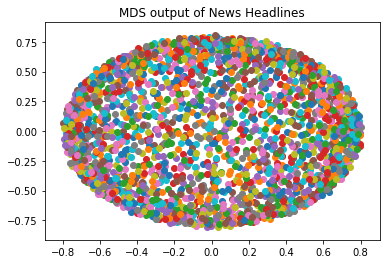

In [32]:
    # Saving cluster visualization after mutidimensional scaling
    for x, y, in zip(xs, ys):
        plt.scatter(x, y)
        plt.title('MDS output of News Headlines')
        plt.savefig('MDS.png')

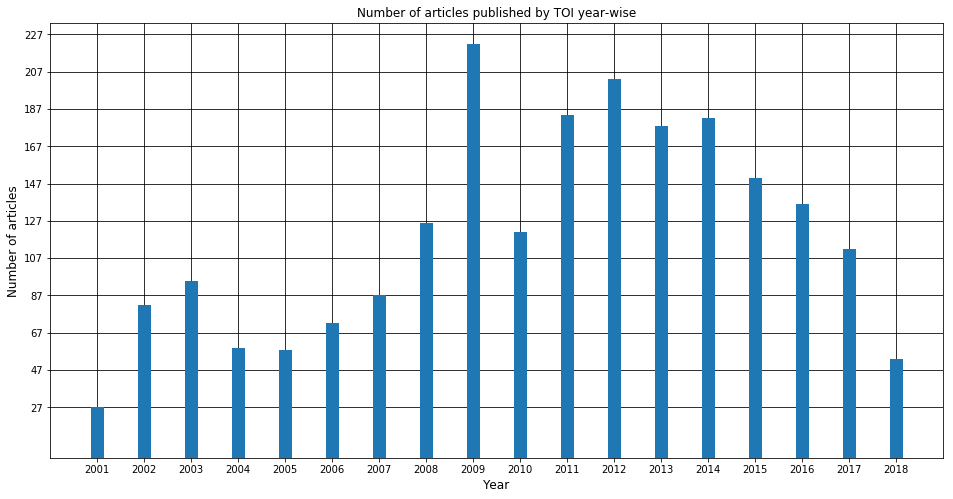

In [39]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.yticks(np.arange(df1['Title'].min(), df1['Title'].max()+20, 20))
plt.xticks(df1.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.grid(True)
ax.grid(color='black', zorder=0)
ax.bar(df1.index, df1['Title'], width = 100, zorder=3)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.title("Number of articles published by TOI year-wise")
plt.show()



In [46]:


df_semi = df.resample('2Q').count()



In [41]:
# quarter start frequency
df_m = df.resample('M').count()

In [43]:
list(df_m)

['label', 'df', 'x', 'y']

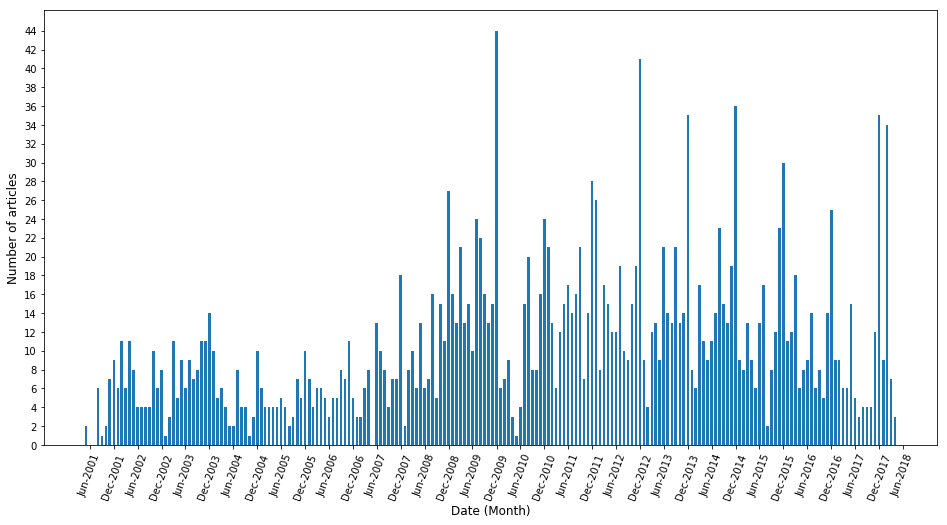

In [47]:


fig, ax = plt.subplots(figsize=(16,8))
plt.yticks(np.arange(df_m['df'].min(), df_m['df'].max()+1, 2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.bar(df_m.index, df_m['df'], width = 20, zorder=10)
plt.xticks(df_semi.index, rotation=70)
plt.xlabel('Date (Month)', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.show()



In [34]:
    # Creating dataframe containing reduced dimensions, identified labels and text data for plotting KMeans output
    df = pd.DataFrame(dict(label=clusters, df=df['Title'], x=xs, y=ys))
    df.to_csv('kmeans_clustered_DF.txt', sep=',')

    label_color_map = {0: 'red',
                       1: 'blue',
                       2: 'green',
                       3: 'pink',
                       4: 'purple',
                       5: 'yellow',
                       6: 'orange',
                       7: 'grey'
                       }

In [35]:
    csv = open('kmeans_clustered_output.txt','w')
    csv.write('Cluster     Headline\n')

21

In [120]:
import collections

In [121]:
counter=collections.Counter(clusters)

In [122]:
counter


Counter({0: 311, 1: 104, 2: 953, 3: 87, 4: 185, 5: 223, 6: 284})

In [119]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6])

In [50]:
from geotext import GeoText


In [53]:
df2 = pd.read_csv('HIV.csv')

In [55]:
df2.dropna(how='any', axis=0, inplace=True)
df2.reset_index(drop=True, inplace=True)



df2['Date'] = df2['Date'].apply(lambda x: re.findall(r'[a-zA-Z]{3}\s[0-9]{1,2}(?:,)*(?:\s)*[0-9]{4}', x))



# df2.head()

df2['Date'] = df2.Date.apply(', '.join)
# df2.head()

df2['Date'] = df2['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
# df2.head()

df2['Date'] = pd.to_datetime(df2['Date'])



df2 = df2.reset_index(drop=True).set_index('Date')



In [83]:
cit=[]
count = []
cities = []
countries = []
places = []

In [72]:
len(df2.article)

2147

In [85]:
for i in range(0,len(df2.article)):
    p = GeoText(df2.article[i])
    cit = p.cities
    count = p.country_mentions
    cities.append(cit)
    countries.append(count)

In [93]:
cities

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Bangalore', 'Guwahati', 'Mumbai'],
 ['Gorakhpur', 'Deoria', 'Mumbai', 'Delhi', 'Chennai'],
 [],
 ['Columbia'],
 ['University', 'Pune'],
 ['Kolkata', 'Kolkata'],
 ['Pune', 'University'],
 ['Of', 'Delhi', 'Delhi'],
 [],
 ['Delhi', 'Delhi', 'Kolkata'],
 ['Delhi', 'Delhi', 'Delhi', 'Kolkata'],
 [],
 ['Gorakhpur', 'Deoria', 'Nagar', 'Mau'],
 ['Delhi', 'Patna'],
 ['Pune', 'Pune'],
 ['Hyderabad'],
 ['Amsterdam'],
 ['Hyderabad',
  'Hyderabad',
  'Of',
  'Hyderabad',
  'Tirupati',
  'Hyderabad',
  'Tirupati'],
 [],
 [],
 ['Lawrence'],
 [],
 ['Of', 'Delhi', 'Delhi'],
 ['Of', 'Delhi', 'Delhi', 'Delhi'],
 [],
 ['Goa', 'Mumbai'],
 ['New Delhi', 'Mission', 'Chandigarh', 'Bangalore', 'University', 'Most'],
 ['Mum

In [96]:
df_cities = pd.DataFrame(cities)`

In [116]:
df_countries = pd.DataFrame(countries)

In [117]:
df_countries.to_csv('df_countries', sep = ',')

In [114]:
np.unique(df_cities[0])

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [107]:
df_cities.to_csv('df_cities', sep=',')

In [104]:
df_cities.nunique()

0     233
1     182
2     147
3     108
4      81
5      61
6      40
7      28
8      19
9      18
10     15
11     10
12      5
13      4
14      3
15      1
dtype: int64

In [89]:
countries


[OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict(),
 OrderedDict([('IN', 3), ('LK', 1)]),
 OrderedDict([('IN', 5)]),
 Ordere

In [58]:
df_countries = co

KeyError: 'Title'

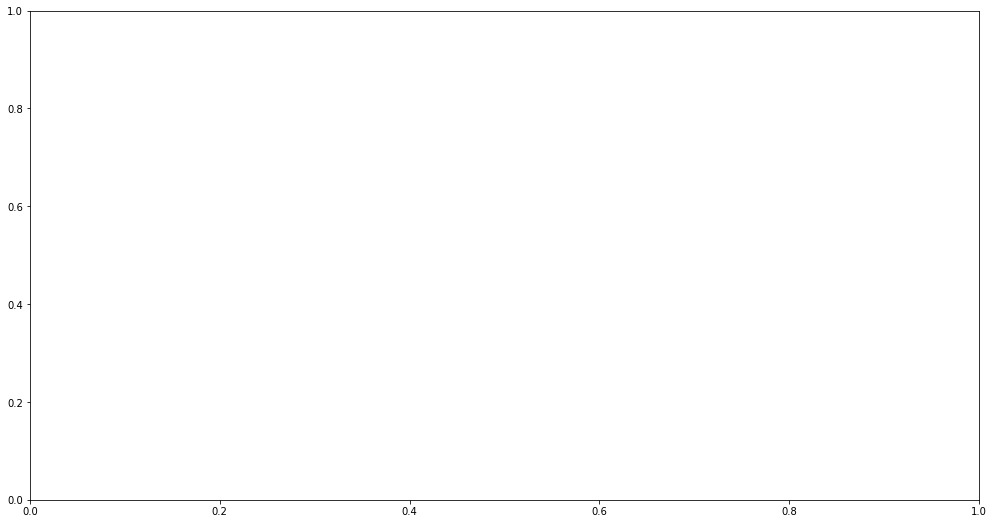

In [38]:
    fig, ax = plt.subplots(figsize=(17, 9))

    for index, row in df.iterrows():
        cluster = row['label']
        label_color = label_color_map[row['label']]
        label_text = row['Title']
        ax.plot(row['x'], row['y'], marker='o', ms=12, c=label_color)
        row = str(cluster) + ',' + label_text + '\n'
        csv.write(row)

    # ax.legend(numpoints=1)
    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['label'], size=8)

    plt.title('News Headlines using KMeans Clustering')
    plt.savefig('kmeans.png')




In [ ]:
if __name__ == '__main__':
     main()

In [ ]:
def main():

    

    # text data in dataframe and removing stops words
    stop_words = set(stopwords.words('english'))
    df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Using TFIDF vectorizer to convert convert words to Vector Space
    tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=tokenize_and_stem)



    # Fit the vectorizer to text data
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['title'])
    terms = tfidf_vectorizer.get_feature_names()
    print(terms)

    # Kmeans++
    km = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=1, verbose=0, random_state=3425)
    km.fit(tfidf_matrix)
    labels = km.labels_
    clusters = labels.tolist()

    # Calculating the distance measure derived from cosine similarity
    distance = 1 - cosine_similarity(tfidf_matrix)

    # Dimensionality reduction using Multidimensional scaling (MDS)
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    pos = mds.fit_transform(distance)
    xs, ys = pos[:, 0], pos[:, 1]

    # Saving cluster visualization after mutidimensional scaling
    for x, y, in zip(xs, ys):
        plt.scatter(x, y)
        plt.title('MDS output of News Headlines')
        plt.savefig('MDS.png')

    # Creating dataframe containing reduced dimensions, identified labels and text data for plotting KMeans output
    df = pd.DataFrame(dict(label=clusters, df=df['title'], x=xs, y=ys))
    df.to_csv('kmeans_clustered_DF.txt', sep=',')

    label_color_map = {0: 'red',
                       1: 'blue',
                       2: 'green',
                       3: 'pink',
                       4: 'purple',
                       5: 'yellow',
                       6: 'orange',
                       7: 'grey'
                       }

    csv = open('kmeans_clustered_output.txt','w')
    csv.write('Cluster     Headline\n')

    fig, ax = plt.subplots(figsize=(17, 9))

    for index, row in df.iterrows():
        cluster = row['label']
        label_color = label_color_map[row['label']]
        label_text = row['data']
        ax.plot(row['x'], row['y'], marker='o', ms=12, c=label_color)
        row = str(cluster) + ',' + label_text + '\n'
        csv.write(row)

    # ax.legend(numpoints=1)
    for i in range(len(df)):
        ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['label'], size=8)

    plt.title('News Headlines using KMeans Clustering')
    plt.savefig('results\kmeans.png')


if __name__ == '__main__':
    main()